In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re
import scipy as sci


In [2]:
def list_o_list(big_list, lil_size):
    l_o_l = []
    for i in range(0, len(big_list), lil_size):
        lil = big_list[i : min(i + lil_size, len(big_list))]
        l_o_l.append(lil)
    return(l_o_l)

In [3]:
def freq_analysis(sample , time, responsefrq =1, sampfrq=5120):
    frqs = ""
    amps = []
    samp_int = 1/sampfrq
    ft = np.fft.fft(sample)/len(sample)
    ft = ft[range(int(len(sample)/2))]
    tpCount = len(sample)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/sampfrq
    frequencies = values/timePeriod
    ft = abs(ft)
    print(len(ft))
    print(len(frequencies))
    feq = pd.DataFrame(data = {"freq":frequencies})
    
    feq["amp"] = ft
    
    frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
    print(len(frqs))
    for n in frqs:
        cu = feq.loc[(feq.freq > n ) & (feq.freq <= n + responsefrq),"amp"].sum()
        
        amps.append(cu)
    
    return(frqs, amps)

In [4]:
test_list  = list(range(1,33,4))
test_chop = 9
print(list_o_list(test_list, test_chop))


[[1, 5, 9, 13, 17, 21, 25, 29]]


In [5]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 '01-08-19-V118_ch1.big',
 '01-08-19-V118_ch2.big',
 '03-05-19_ch1.big',
 '03-05-19_ch2.big',
 '03-26-19_ch1.big',
 '03-26-19_ch2.big',
 '08-14-18-V118_ch1.big',
 '08-14-18-V118_ch2.big',
 'alt_modular.py',
 'bayesian_optimiser_tute.py',
 'capstone2_milestone 2.ipynb',
 'checkpoint.pth',
 'data',
 'data_prep.ipynb',
 'data_prep_development.ipynb',
 'data_prep_final.ipynb',
 'EDA.ipynb',
 'EDA2.ipynb',
 'eda2_b.ipynb',
 'EDA3.ipynb',
 'Figure 2020-11-08 143412.png',
 'Figure 2020-11-08 143421.png',
 'ft_first_3000.csv',
 'gps_inclusion.ipynb',
 'init_lstm_epoch_10.dat',
 'init_lstm_optim_state_epoch_10.dat',
 'init_lstm_state_epoch_10.dat',
 'linear_LSTM.py',
 'lstm.ipynb',
 'lstm2.py',
 'lstm2_data_prep.py',
 'lstm2_data_prep_double_sensor.py',
 'LSTM_classes.py',
 'LSTM_classes_functions.py',
 'lstm_examples.py',
 'lstm_model_01.py',
 'LSTM_modular.py',
 'LSTM_modular_combined.py',
 'LSTM_modular_two_sensor.py',
 'lstm_multivari

In [6]:
home = os.getcwd()


In [7]:
os.chdir("./data/03-05-19-V118")
os.getcwd()

'C:\\Users\\Grey Ghost\\Documents\\GitHub\\project-sturm_drang\\data\\03-05-19-V118'

In [8]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [9]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"])
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"])
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")

In [10]:
del df
del df2

find the relationship between velocity and amplitude
then use the sections of higher quality gps signal to establish the realtionship between velocity and amplitude.

try on 20-30 second fourier transform.

try using

power spectrum/frequency analysis of each accelerometer.

clustering (historical and spacial) expect 5(ish) clusters, stoped, linear tavel, cornering, acceleration/decceleration. (curve radius)  engine/motor (also wheel constant) effects. 

silhouete

break all data files down to one particular consistent section of track

decision tree model for velocity (gps) prediction

first intergral of low frequency acceleration may give velocity.



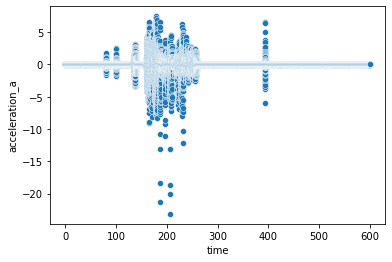

In [11]:

a = sb.scatterplot(x="time", y="acceleration_a", data= raw.loc[raw.time<600,:])
a.figure.savefig("raw _short.png")


(59744256, 3)


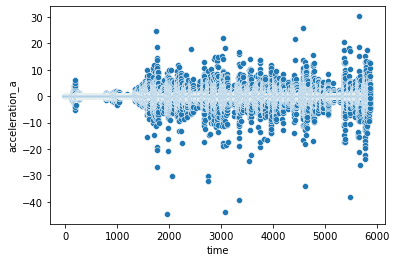

In [12]:
alpha = raw.shape[0]
print(raw.shape)
aa = np.arange(0, alpha, 500)
b = sb.scatterplot(x="time", y="acceleration_a", data= raw.loc[aa[:60000],:])
b.figure.savefig("raw_downsampled.png")

In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 4.3 GB


In [14]:
raw.describe()

,time,acceleration_a,acceleration_b
count,5.974426e+07,5.974426e+07,5.974426e+07
mean,5.834400e+03,-4.753257e-07,-2.379909e-06
std,3.368492e+03,1.943521e+00,1.777598e+00
min,0.000000e+00,-2.454301e+02,-2.871722e+02
25%,2.917200e+03,-2.410161e-01,-2.312341e-01
50%,5.834400e+03,1.924367e-04,1.500675e-04
75%,8.751600e+03,2.614650e-01,2.489711e-01
max,1.166880e+04,9.579732e+01,1.615189e+02


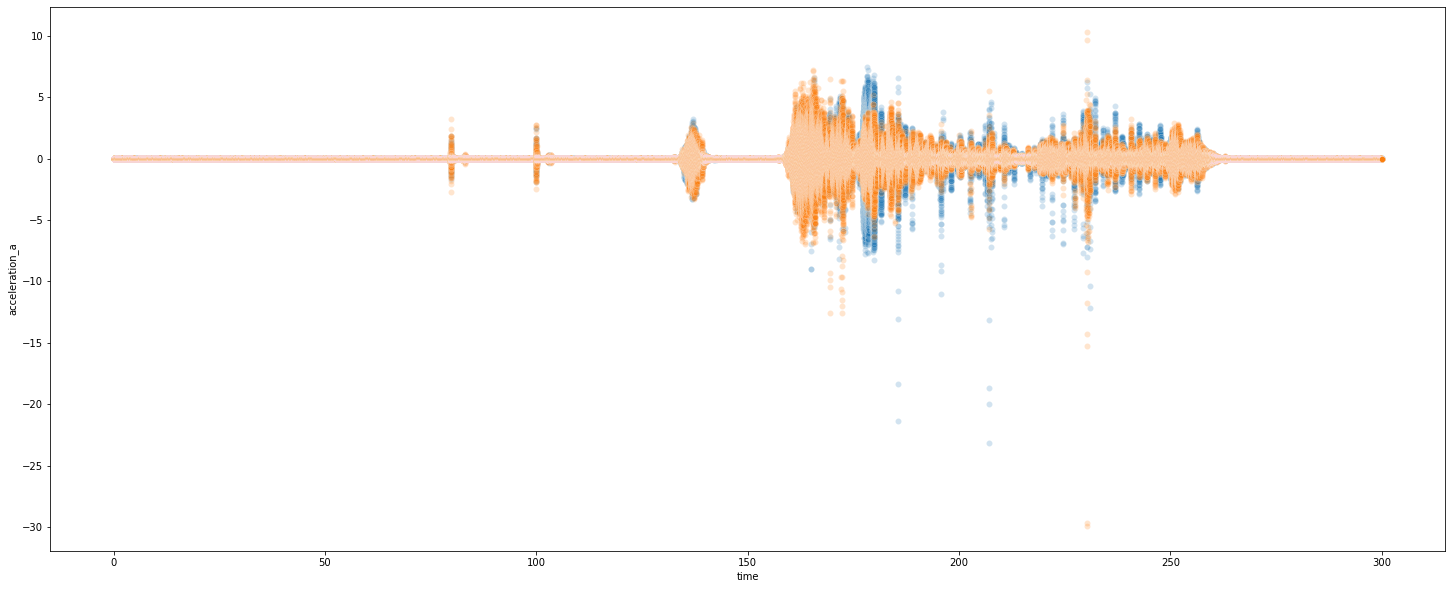

In [15]:
plt.figure(figsize=(25,10))
c = sb.scatterplot(x="time", y="acceleration_a", data = raw.loc[raw.time<300,:], alpha=0.2)
c = sb.scatterplot(x="time", y="acceleration_b", data = raw.loc[raw.time<300,:], alpha=0.2)
plt.show()
c.figure.savefig("combined_raw.png")


take first 25 mins for saftey then identify terminus 
abreviate to stoped in yard to stopped in terminus


In [16]:
safe_len =60*60
dev = raw.loc[raw.time<safe_len,:]

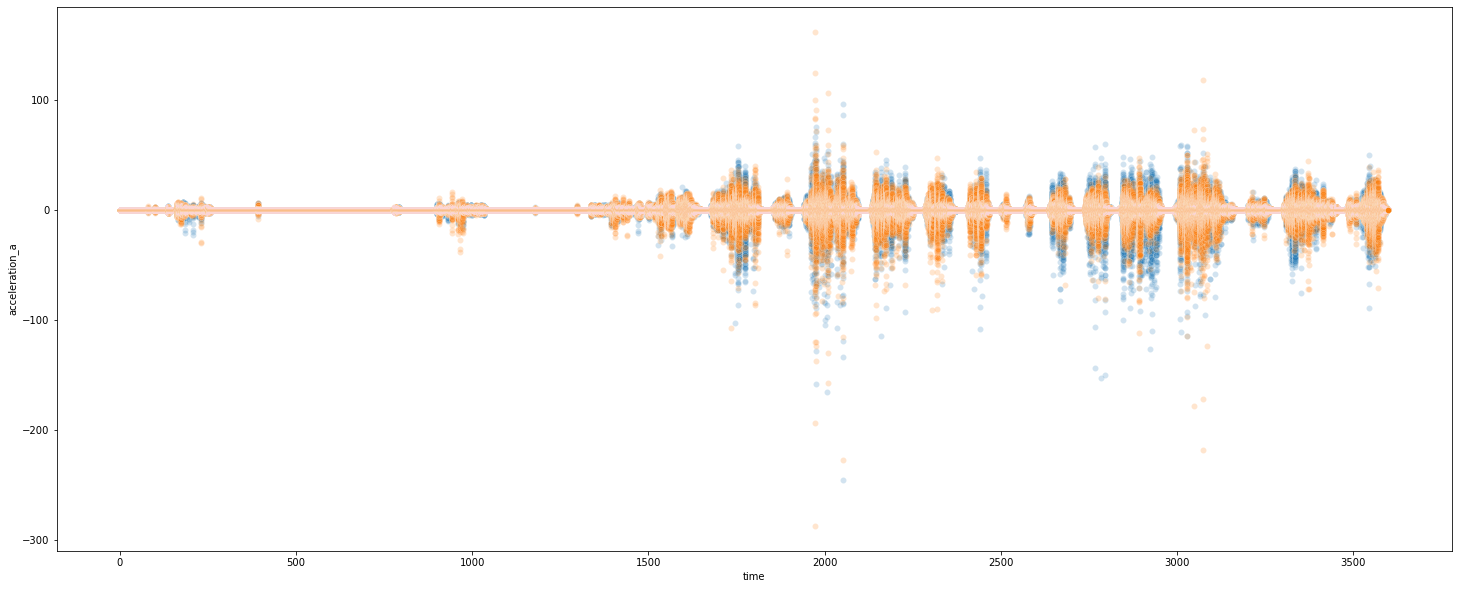

In [17]:
plt.figure(figsize=(6,6))
d = sb.scatterplot(x="time", y="acceleration_a", data = dev, alpha=0.2)
d = sb.scatterplot(x="time", y="acceleration_b", data = dev, alpha=0.2)
plt.show()
d.figure.savefig("long_combo.png")

In [57]:
raw.tail()

,time,acceleration_a,acceleration_b
59744251,11668.7992,0.004007,0.001895
59744252,11668.7994,0.001367,0.001693
59744253,11668.7996,0.006664,0.002852
59744254,11668.7998,0.009457,-0.006411
59744255,11668.8000,0.005155,-0.003356


In [59]:
hh = 11668.8
hab = hh/60
print(hab)

194.48


In [19]:
safe_len/60


60.0

In [20]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432000 entries, 0 to 18431999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 562.5 MB


In [21]:
dev["abs_a"] = dev["acceleration_a"].abs()
dev["abs_b"] = dev.acceleration_b.abs()
dev.describe()

<ipython-input-21-5b805411566e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["abs_a"] = dev["acceleration_a"].abs()
<ipython-input-21-5b805411566e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["abs_b"] = dev.acceleration_b.abs()


,time,acceleration_a,acceleration_b,abs_a,abs_b
count,1.843200e+07,1.843200e+07,1.843200e+07,1.843200e+07,1.843200e+07
mean,1.800000e+03,-1.918004e-06,-1.044930e-05,6.208433e-01,5.766181e-01
std,1.039231e+03,1.504385e+00,1.359043e+00,1.370302e+00,1.230654e+00
min,0.000000e+00,-2.454301e+02,-2.871722e+02,0.000000e+00,0.000000e+00
25%,9.000000e+02,-8.217088e-02,-7.810233e-02,7.059733e-03,6.255190e-03
50%,1.800000e+03,9.769177e-05,7.296055e-05,8.548379e-02,8.167366e-02
75%,2.700000e+03,8.883896e-02,8.535142e-02,7.036615e-01,6.711279e-01
max,3.600000e+03,9.579732e+01,1.615189e+02,2.454301e+02,2.871722e+02


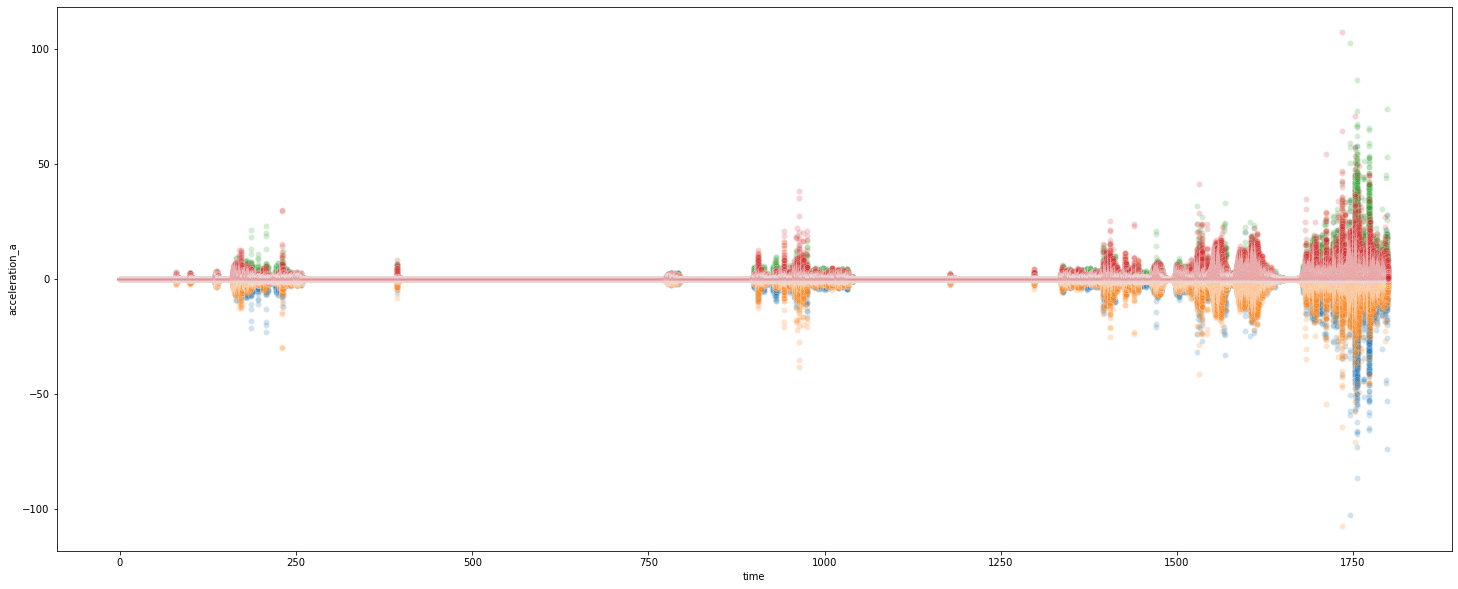

In [22]:
cols = list(dev.columns)
cols.remove("time")
plt.figure(figsize=(25,10))
for n in cols:
    e = sb.scatterplot(x="time", y=n, data=dev.loc[dev.time <1800,:], alpha=0.2)
plt.show()
e.figure.savefig("all_raw.png")

['acceleration_a', 'acceleration_b', 'abs_a', 'abs_b']


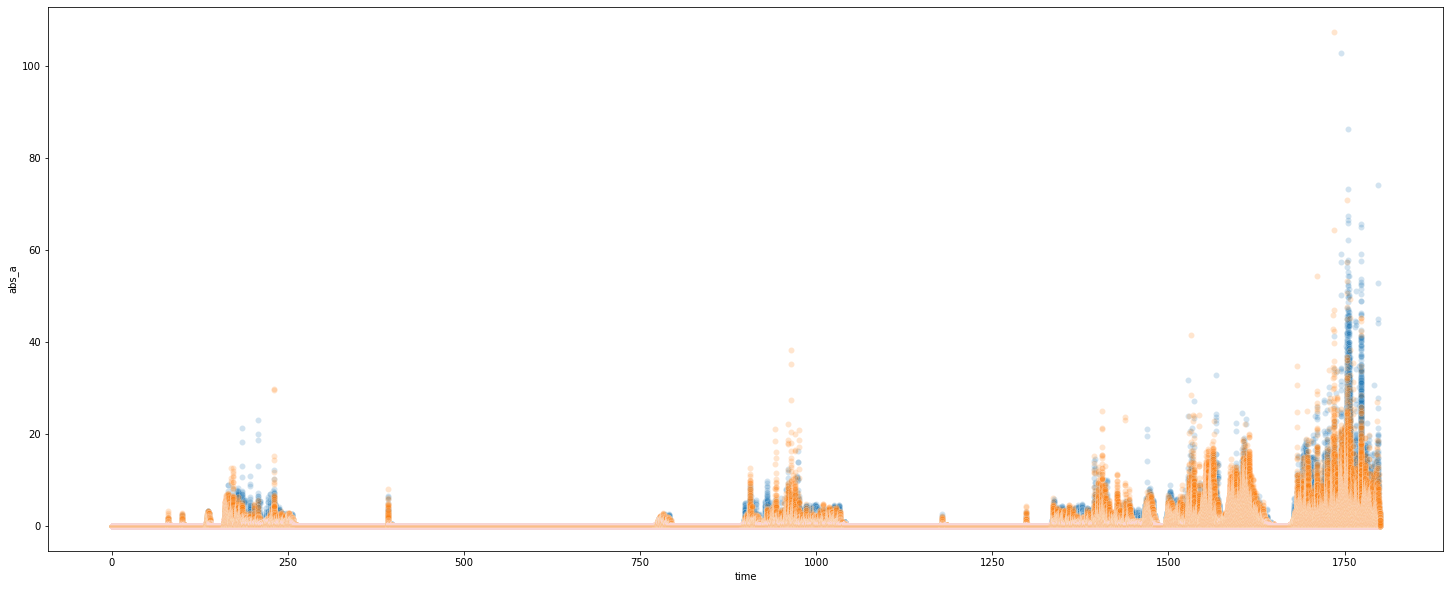

In [60]:
cols = list(dev.columns)
cols.remove("time")
print(cols)
cols = cols[2:]
plt.figure(figsize=(25,10))
for n in cols:
    e = sb.scatterplot(x="time", y=n, data=dev.loc[dev.time <1800,:], alpha=0.2)
plt.show()
e.figure.savefig("all_abs_raw.png")

In [24]:
y_a = np.fft.fft(dev.acceleration_a)

In [25]:
type(y_a)

numpy.ndarray

In [26]:
len(y_a)

18432000

In [27]:
len(dev)

18432000

C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


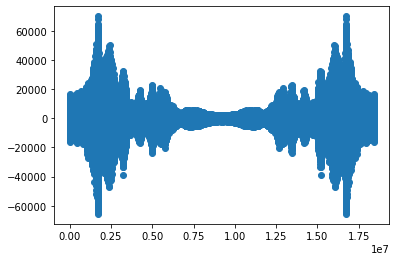

In [28]:
plt.scatter(np.arange(0 , len(y_a)), y_a)
plt.show()
#chunk = raw.loc[(raw.time>3600)&(raw.time<4200),:]
chunk = raw.copy()

In [29]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 4.3 GB


In [30]:
p2 = abs(y_a/len(dev))


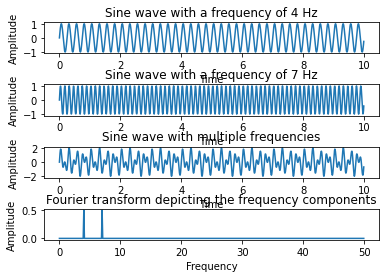

In [31]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

25600
9216000


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


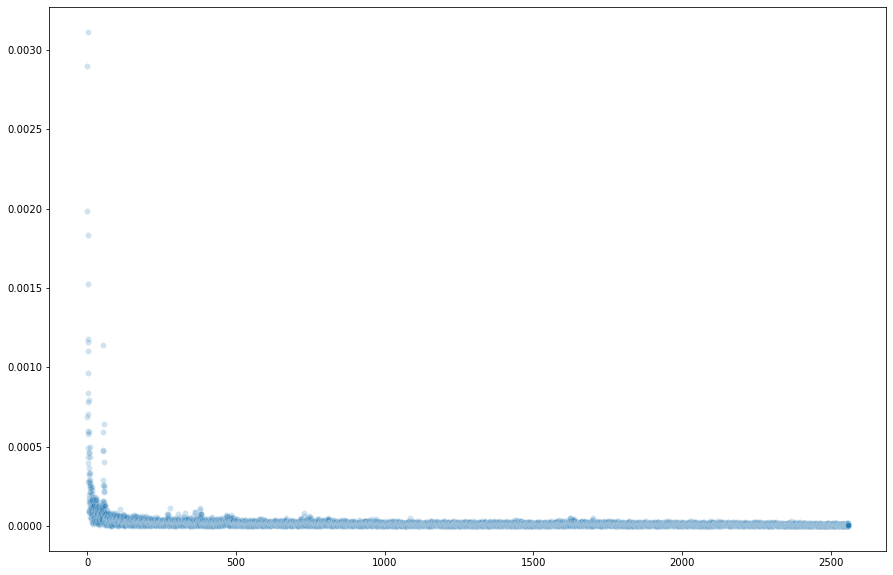

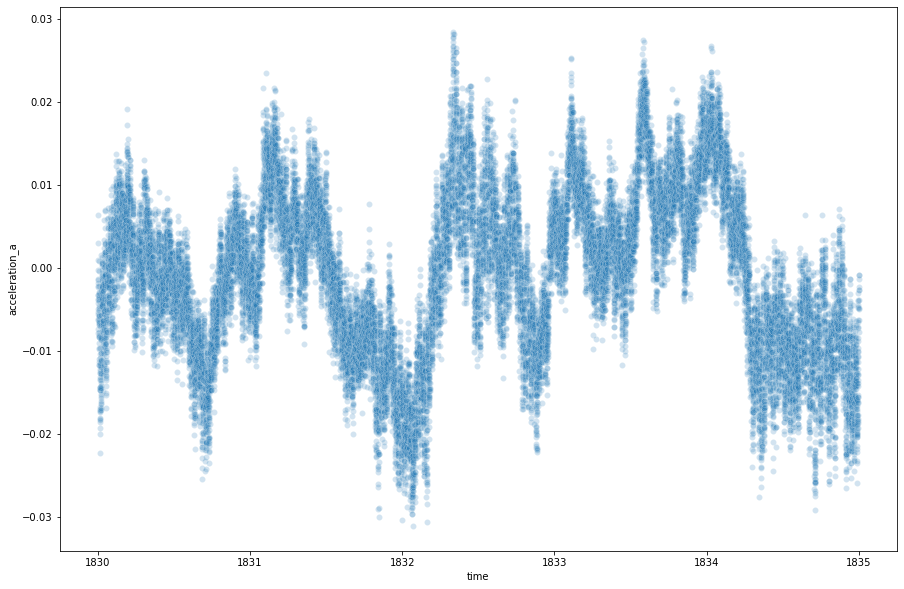

In [32]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 5120;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 1830;

 

# End time period of the signals

endTime             = 1835; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);
print(len(time))
print(1800*5120)

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot



 



 

# Add the sine waves

amplitude = chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),"acceleration_a"]

 

# Time domain representation of the resultant sine wave


 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation


plt.figure(figsize=(15,10))
sb.scatterplot(frequencies, abs(fourierTransform), alpha =0.2)

plt.show()
plt.figure(figsize=(15,10))
sb.scatterplot(x="time", y="acceleration_a", data=chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),:], alpha = 0.2)
plt.show()

feq = pd.DataFrame(data = {"freq":frequencies})

12800
12800
2560


<AxesSubplot:>

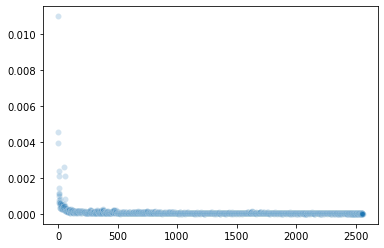

In [33]:
a,b = freq_analysis(sample = chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),"acceleration_a"], time = endTime - beginTime, sampfrq = 5120, responsefrq= 1)

sb.scatterplot(x=a, y=b, alpha=0.2)

In [34]:
feq.info()
feq["amp"] = abs(fourierTransform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   freq    12800 non-null  float64
dtypes: float64(1)
memory usage: 100.1 KB


     freq       amp
0     0.0  0.000689
1     0.2  0.001983
2     0.4  0.002902
3     0.6  0.001162
4     0.8  0.003115
5     1.0  0.001837
6     1.2  0.000836
7     1.4  0.001524
9     1.8  0.001101
10    2.0  0.000599
11    2.2  0.001179
12    2.4  0.000965
14    2.8  0.000782
15    3.0  0.000577
16    3.2  0.000706
23    4.6  0.000594
24    4.8  0.000794
268  53.6  0.001140
271  54.2  0.000592
273  54.6  0.000645


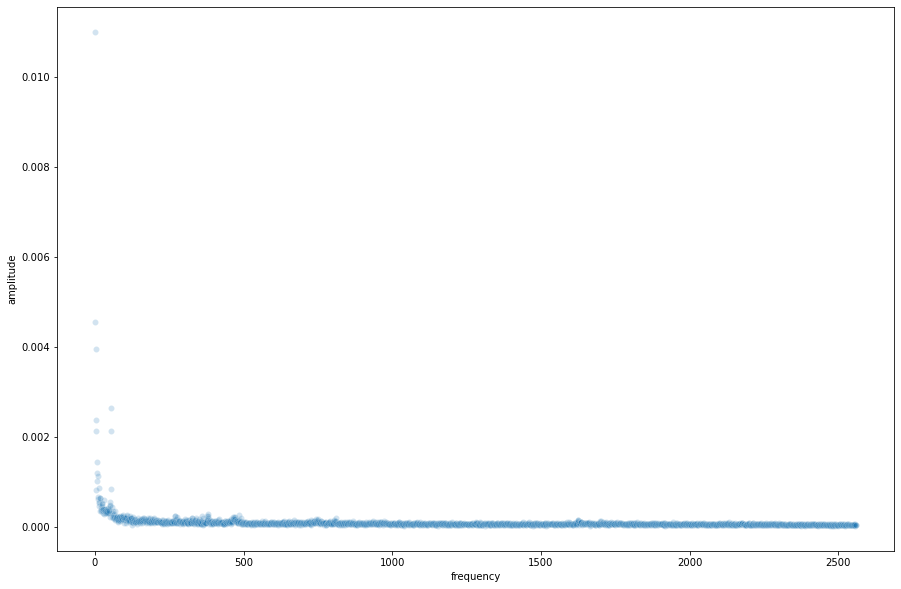

   frequency  amplitude
0          0   0.010999


,frequency,amplitude
0,0,0.010999
1,1,0.004549
2,2,0.003940
3,3,0.002122
4,4,0.002379


In [35]:
print(feq.loc[feq.amp>0.0005,:])
freqs = np.arange(0, 1 + int(feq.freq.max()), 1)
amps = []
for n in freqs:
    cu = feq.loc[(feq.freq > n ) & (feq.freq <= n + 1),"amp"].sum()
    amps.append(cu)
sum_feq = pd.DataFrame( data = {"frequency":freqs, "amplitude":amps})

plt.figure(figsize=(15,10))
sb.scatterplot(x= "frequency", y = "amplitude", data=sum_feq, alpha = 0.2)
plt.show()
print(sum_feq.loc[sum_feq.amplitude>0.01,:])
sum_feq.head()


12800
12800
256
256 256


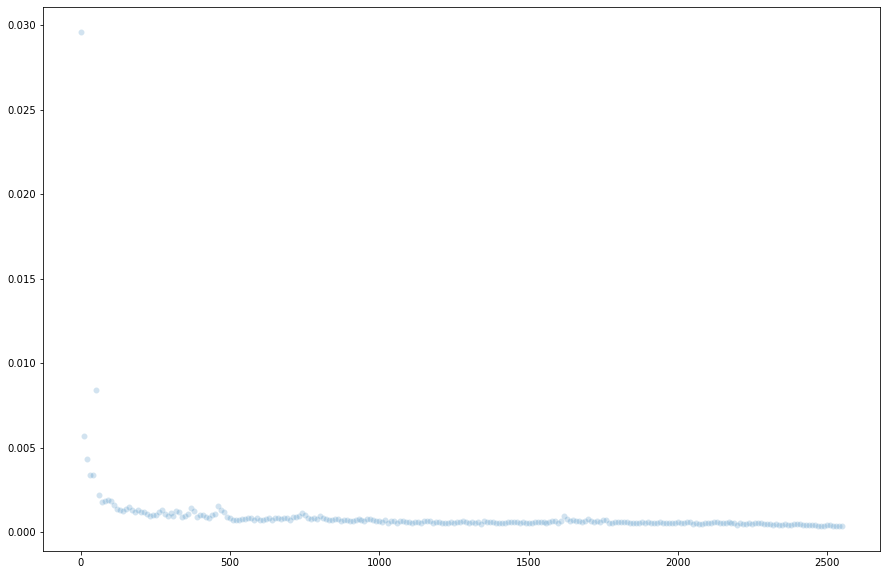

In [36]:
a,b = freq_analysis(sample = chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),"acceleration_a"], time = endTime - beginTime, sampfrq = 5120, responsefrq= 10)

print(len(a), len(b))
plt.figure(figsize =(15,10))
sb.scatterplot(x=a, y=b, alpha=0.2)
plt.show()

In [37]:
b[0:15]

[0.029592259723624004,
 0.005678954886130332,
 0.004352516847844354,
 0.0033834015470283383,
 0.0033576249548832255,
 0.00841442390728736,
 0.002222306717331169,
 0.0017805964541949422,
 0.0018499600106317694,
 0.0018984824249974987,
 0.0018204457757819707,
 0.0015845713943733874,
 0.0013643857497520593,
 0.0013255988124829636,
 0.001249259138858313]

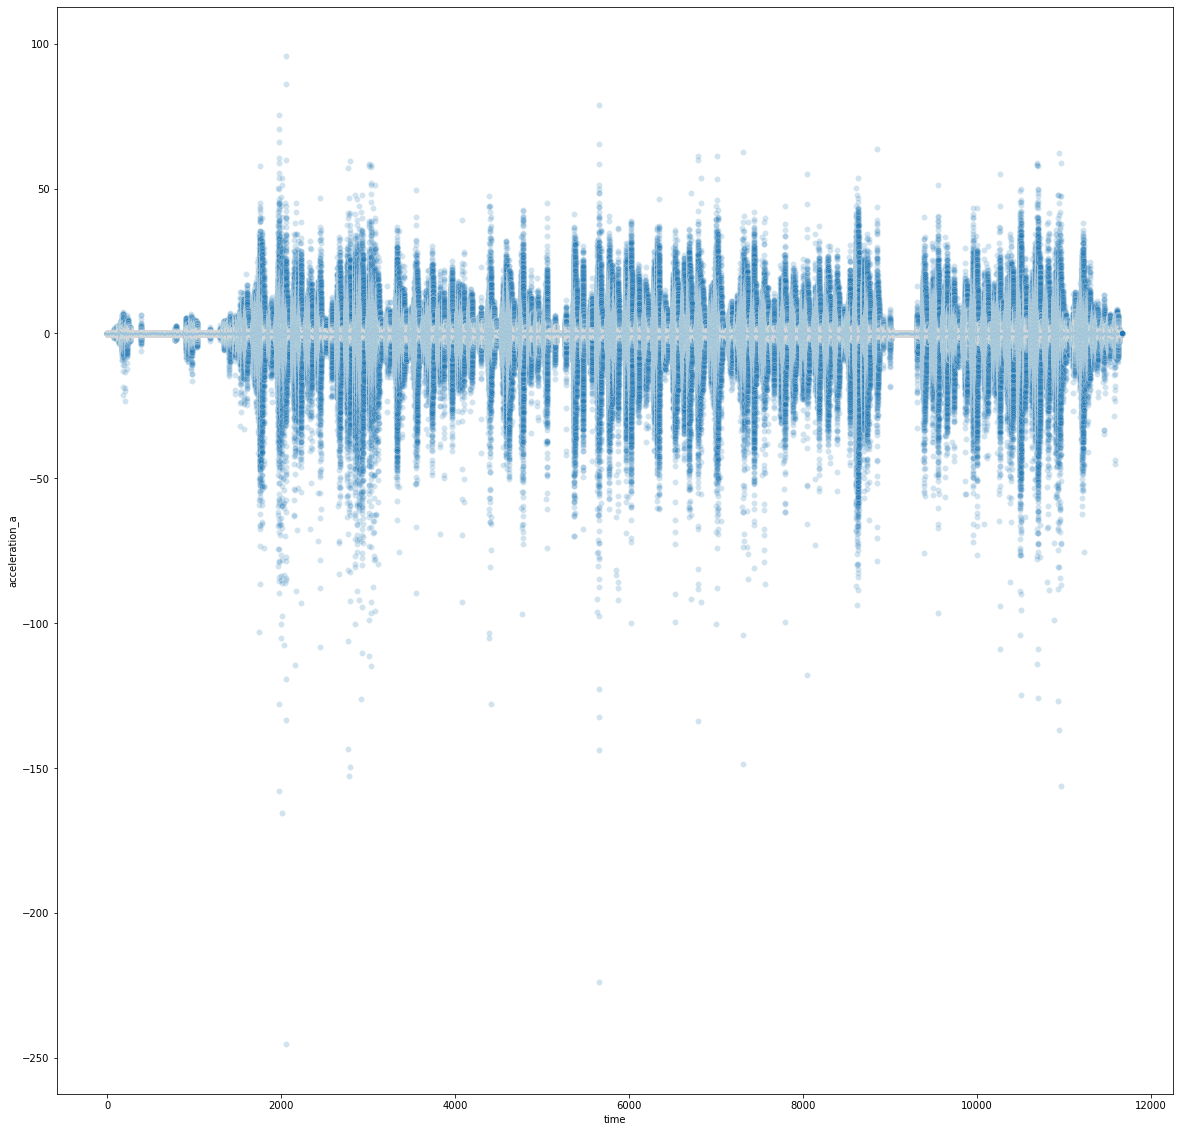

In [38]:
plt.figure(figsize=(20,20))
sb.scatterplot(x = "time", y = "acceleration_a", data = chunk, alpha= 0.2)
plt.show()

In [39]:
type(fourierTransform)
len(fourierTransform)

12800

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


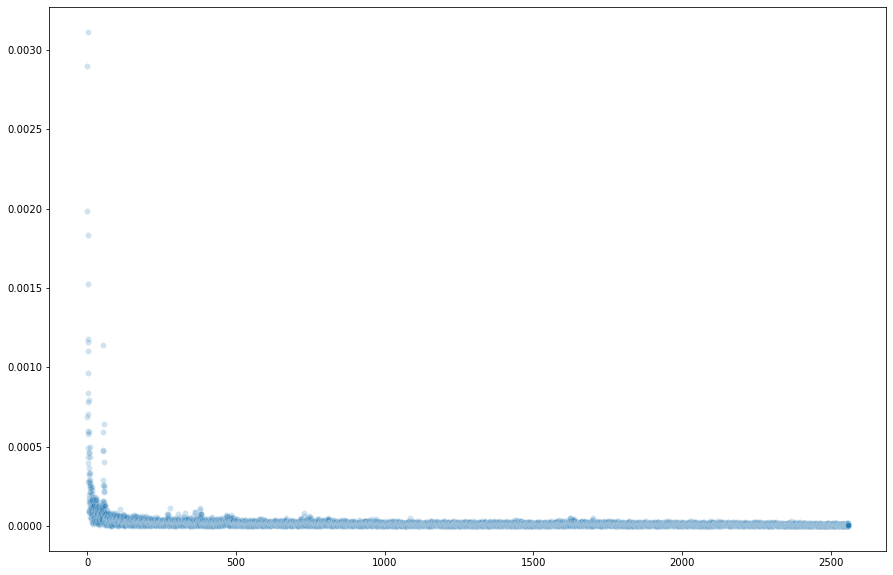

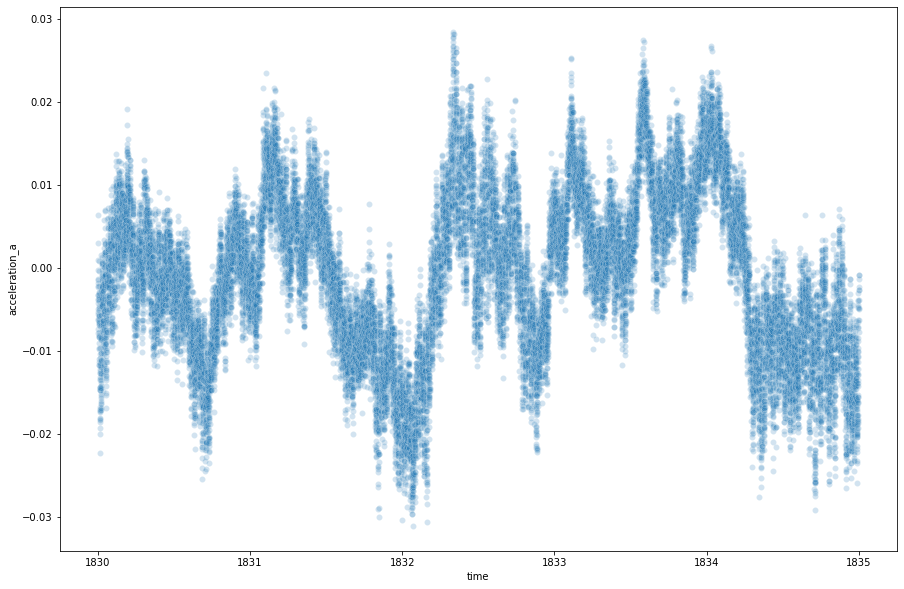

In [40]:
plt.figure(figsize=(15,10))
sb.scatterplot(frequencies, abs(fourierTransform), alpha =0.2)

plt.show()
plt.figure(figsize=(15,10))
sb.scatterplot(x = "time", y = "acceleration_a", data=chunk.loc[(chunk.time<endTime)&(chunk.time>beginTime),:], alpha = 0.2)
plt.show()

In [41]:
print(dev.loc[(dev.time >0.995) & (dev.time < 1.005),:])

          time  acceleration_a  acceleration_b     abs_a     abs_b
5095  0.995117       -0.004126       -0.001106  0.004126  0.001106
5096  0.995313       -0.008159       -0.002047  0.008159  0.002047
5097  0.995508       -0.006263        0.001794  0.006263  0.001794
5098  0.995703       -0.006664        0.000948  0.006664  0.000948
5099  0.995898       -0.006433        0.000440  0.006433  0.000440
5100  0.996094       -0.003540        0.001764  0.003540  0.001764
5101  0.996289       -0.002882        0.000900  0.002882  0.000900
5102  0.996484       -0.005710        0.001806  0.005710  0.001806
5103  0.996680       -0.009192       -0.001640  0.009192  0.001640
5104  0.996875       -0.007124        0.000833  0.007124  0.000833
5105  0.997070       -0.009811       -0.000474  0.009811  0.000474
5106  0.997266       -0.007120       -0.002758  0.007120  0.002758
5107  0.997461       -0.006805       -0.001118  0.006805  0.001118
5108  0.997656       -0.006154       -0.001479  0.006154  0.00

In [42]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 4.3 GB


In [43]:
range(int(len(amplitude)/2))

range(0, 12800)

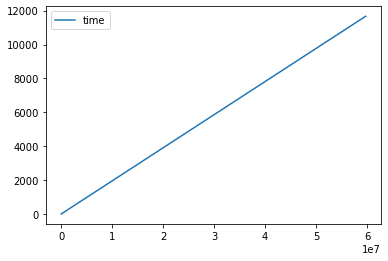

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 4.3 GB
None


In [44]:
chunk.plot(y="time")
plt.show()
print(chunk.info())

In [45]:
raw.iloc[9215995:9216005,:]

,time,acceleration_a,acceleration_b
9215995,1799.99905,0.188134,-0.362453
9215996,1799.99925,-0.046570,0.630424
9215997,1799.99944,-0.686368,0.265013
9215998,1799.99964,-0.502033,0.858849
9215999,1799.99983,0.843927,1.346160
9216000,1800.00003,-0.177585,0.475746
9216001,1800.00022,-0.376331,0.621149
9216002,1800.00042,-0.312517,0.164888
9216003,1800.00061,0.786916,-0.215421
9216004,1800.00081,1.102900,-0.327661


In [46]:
chunk.head()

,time,acceleration_a,acceleration_b
0,0.000000,0.017924,0.005147
1,0.000195,0.013339,0.010883
2,0.000391,0.014236,0.007775
3,0.000586,0.016708,0.009718
4,0.000781,0.014728,0.009120


In [47]:
chunk.tail()
chunk= raw.copy()

In [48]:
chunk["mins"] = chunk.time // 60

In [49]:
chunk["hours"] = chunk.time // 3600

In [50]:
chunk.head()

,time,acceleration_a,acceleration_b,mins,hours
0,0.000000,0.017924,0.005147,0.0,0.0
1,0.000195,0.013339,0.010883,0.0,0.0
2,0.000391,0.014236,0.007775,0.0,0.0
3,0.000586,0.016708,0.009718,0.0,0.0
4,0.000781,0.014728,0.009120,0.0,0.0


In [51]:
chunk.tail()

,time,acceleration_a,acceleration_b,mins,hours
59744251,11668.7992,0.004007,0.001895,194.0,3.0
59744252,11668.7994,0.001367,0.001693,194.0,3.0
59744253,11668.7996,0.006664,0.002852,194.0,3.0
59744254,11668.7998,0.009457,-0.006411,194.0,3.0
59744255,11668.8000,0.005155,-0.003356,194.0,3.0


In [52]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
 3   mins            float64
 4   hours           float64
dtypes: float64(5)
memory usage: 5.2 GB


In [53]:
chunk.describe()

,time,acceleration_a,acceleration_b,mins,hours
count,5.974426e+07,5.974426e+07,5.974426e+07,5.974426e+07,5.974426e+07
mean,5.834400e+03,-4.753257e-07,-2.379909e-06,9.674064e+01,1.148910e+00
std,3.368492e+03,1.943521e+00,1.777598e+00,5.614191e+01,9.448152e-01
min,0.000000e+00,-2.454301e+02,-2.871722e+02,0.000000e+00,0.000000e+00
25%,2.917200e+03,-2.410161e-01,-2.312341e-01,4.800000e+01,0.000000e+00
50%,5.834400e+03,1.924367e-04,1.500675e-04,9.700000e+01,1.000000e+00
75%,8.751600e+03,2.614650e-01,2.489711e-01,1.450000e+02,2.000000e+00
max,1.166880e+04,9.579732e+01,1.615189e+02,1.940000e+02,3.000000e+00


In [54]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
 3   mins            float64
 4   hours           float64
dtypes: float64(5)
memory usage: 5.2 GB


In [55]:
del chunk

In [56]:
chunk.info()

NameError: name 'chunk' is not defined

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:xlabel='time'>

<Figure size 720x576 with 0 Axes>

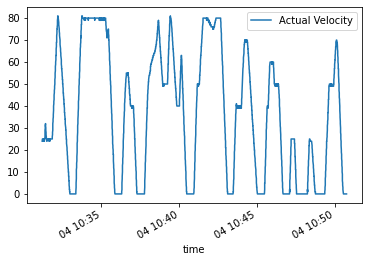

<Figure size 720x576 with 0 Axes>

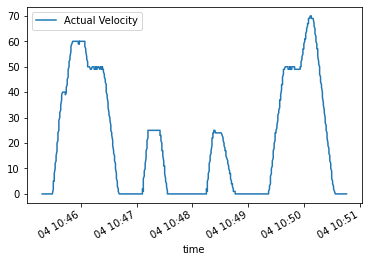

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./data/snoops.csv")
df["time"] = pd.to_datetime(df["Time"])
df2 = df.set_index("time")
df2["locc"] = df2["GW Area"].astype("category")
df3 = df2.between_time("10:35", "10:49")


df4 = df.iloc[:4000, :]
df4 = df4.loc[df["Train Integrity"] == "Est"]




a = np.arange(600, 600 + df4.shape[0])


df4["x"] = a


plt.figure(figsize=(10,8))
df4.iloc[:,:].plot(x="time", y= "Actual Velocity")


plt.figure(figsize=(10,8))
df4.iloc[2800:,:].plot(x="time", y= "Actual Velocity")



In [2]:
df.head()

,Date,Time,VCC,CHN,Loop ID,Veh ID,Target Point,Commanded Direction,Door Cmd,Max Vel,...,Actual Velocity,Type AB,Veh ID.1,Special Message,Previous Loop ID,Prev Entry Dir,No Rx,Track Section,GW Area,time
0,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,2021-04-04 10:31:11
1,19/03/05,10:31:11,2,3,7,117,430,GD1,Closed,25,...,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket,2021-04-04 10:31:11
2,19/03/05,10:31:11,2,2,7,117,430,GD1,Closed,25,...,24.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,2021-04-04 10:31:11
3,19/03/05,10:31:12,2,3,7,117,430,GD1,Closed,25,...,0.0,NaN,NaN,NaN,NaN,NaN,B,0,OMC Pocket,2021-04-04 10:31:12
4,19/03/05,10:31:12,2,2,7,117,430,GD1,Closed,25,...,25.0,NaN,NaN,NaN,NaN,NaN,0,0,~OMC I/B,2021-04-04 10:31:12


In [13]:
print(df.shape)
dfi = df.loc[df["Veh ID"] == 117,:]
print(dfi.shape)
dfg = dfi.loc[dfi["Train Integrity"] == "Est",:]
print(dfg.shape)
df5 = dfg.loc[:,["Time", "Actual Velocity", "Track Section", "GW Area", "time"]]
df5 = df5.loc[df5["Actual Velocity"] <= 90, :]
df5 = df5.drop_duplicates()
df5 = df5.dropna()
print(df5.shape)
df5.head()


(32947, 41)
(23530, 41)
(22991, 41)
(16688, 5)


,Time,Actual Velocity,Track Section,GW Area,time
0,10:31:11,24.0,0,~OMC I/B,2021-04-04 10:31:11
4,10:31:12,25.0,0,~OMC I/B,2021-04-04 10:31:12
9,10:31:13,25.0,0,~OMC I/B,2021-04-04 10:31:13
12,10:31:13,25.0,2580,OMC Pocket,2021-04-04 10:31:13
14,10:31:14,25.0,2580,OMC Pocket,2021-04-04 10:31:14


In [14]:
df5.describe()

,Actual Velocity,Track Section
count,16688.000000,16688.000000
mean,40.663291,3183.758749
std,28.459131,2105.666506
min,0.000000,0.000000
25%,14.000000,952.750000
50%,43.000000,2881.000000
75%,67.000000,5293.250000
max,81.000000,6315.000000


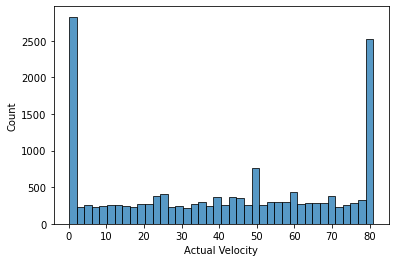

In [27]:
sb.histplot(data=df5, x = "Actual Velocity", bins = 40)
plt.savefig("speed_hist.png")
plt.show()

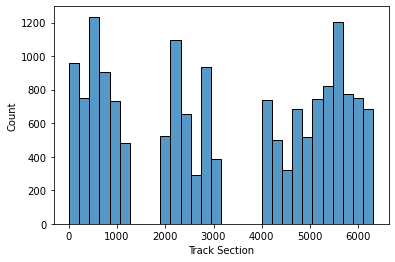

In [21]:
sb.histplot(data=df5, x = "Track Section", bins = 30)
plt.savefig("track_num_hist.png")
plt.show()

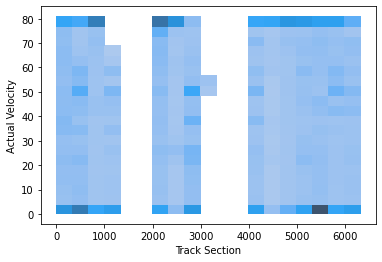

In [23]:
sb.histplot(data=df5, x = "Track Section", y = "Actual Velocity")
plt.savefig("track_speed_hist.png")
plt.show()